In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#predict- kas turi itaka kiek isleis?


from sklearn.linear_model import LinearRegression



Pardavėjas siunčia klientams katalogus, kurie charakterizuoja prekes. Tuomet pirkėjai užsisako prekes 
tiesiogiai iš šių katalogų. Pardavėjas užfiksavo 1000 klientų duomenis, kad suprastų, kas vienus 
klientus verčia išleisti daugiau nei kitus. Duomenys sudaryti iš tokių klientų duomenų (stulpelių):
* 1.Amžiaus (Age), kuris turi reikšmes Old, Middle, Young  ;
* 2.Lyties (Gender) - Male, Fermale;
* 3.Būsto (Ar turi nuosavą būstą, ar ne? Stulpelio pavadinimas OwnHome) - Įgyjamos reikšmės Yes, No;
* 4.Šeimyninės padėties (Vedęs, Susituokusi ar ne. Stulpelio pavadinimas - Married) - reikšmės Simgle, Married;
* 5.Lokacijos (Location) - reikšmės Far, Close;
* 6.Uždarbis (Salary) - Skaitinės reikšmės doleriais;
* 7.Vaikų kiekis (Children) - Skaičius nuo 0 iki 3;
* 8.Istorija(History) - koks apsilankymo dažnis, reikšmės low, medium, high, ir NA (Nesilankė);
* 9.Katalogų skaičius (Catalogs) -  skaitinė reikšmė, kuri parodo kiek katalogų buvo nusiųsta;
* 10.Išleista pinigų suma (AmountSpent);



# Duomenų nuskaitymas

In [2]:
df = pd.read_csv('C:\\Users\\samanta123\\Desktop\projektas\DirectMarketing.csv')
df.head(5)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


# Pasiskirstymo grafikai

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
   

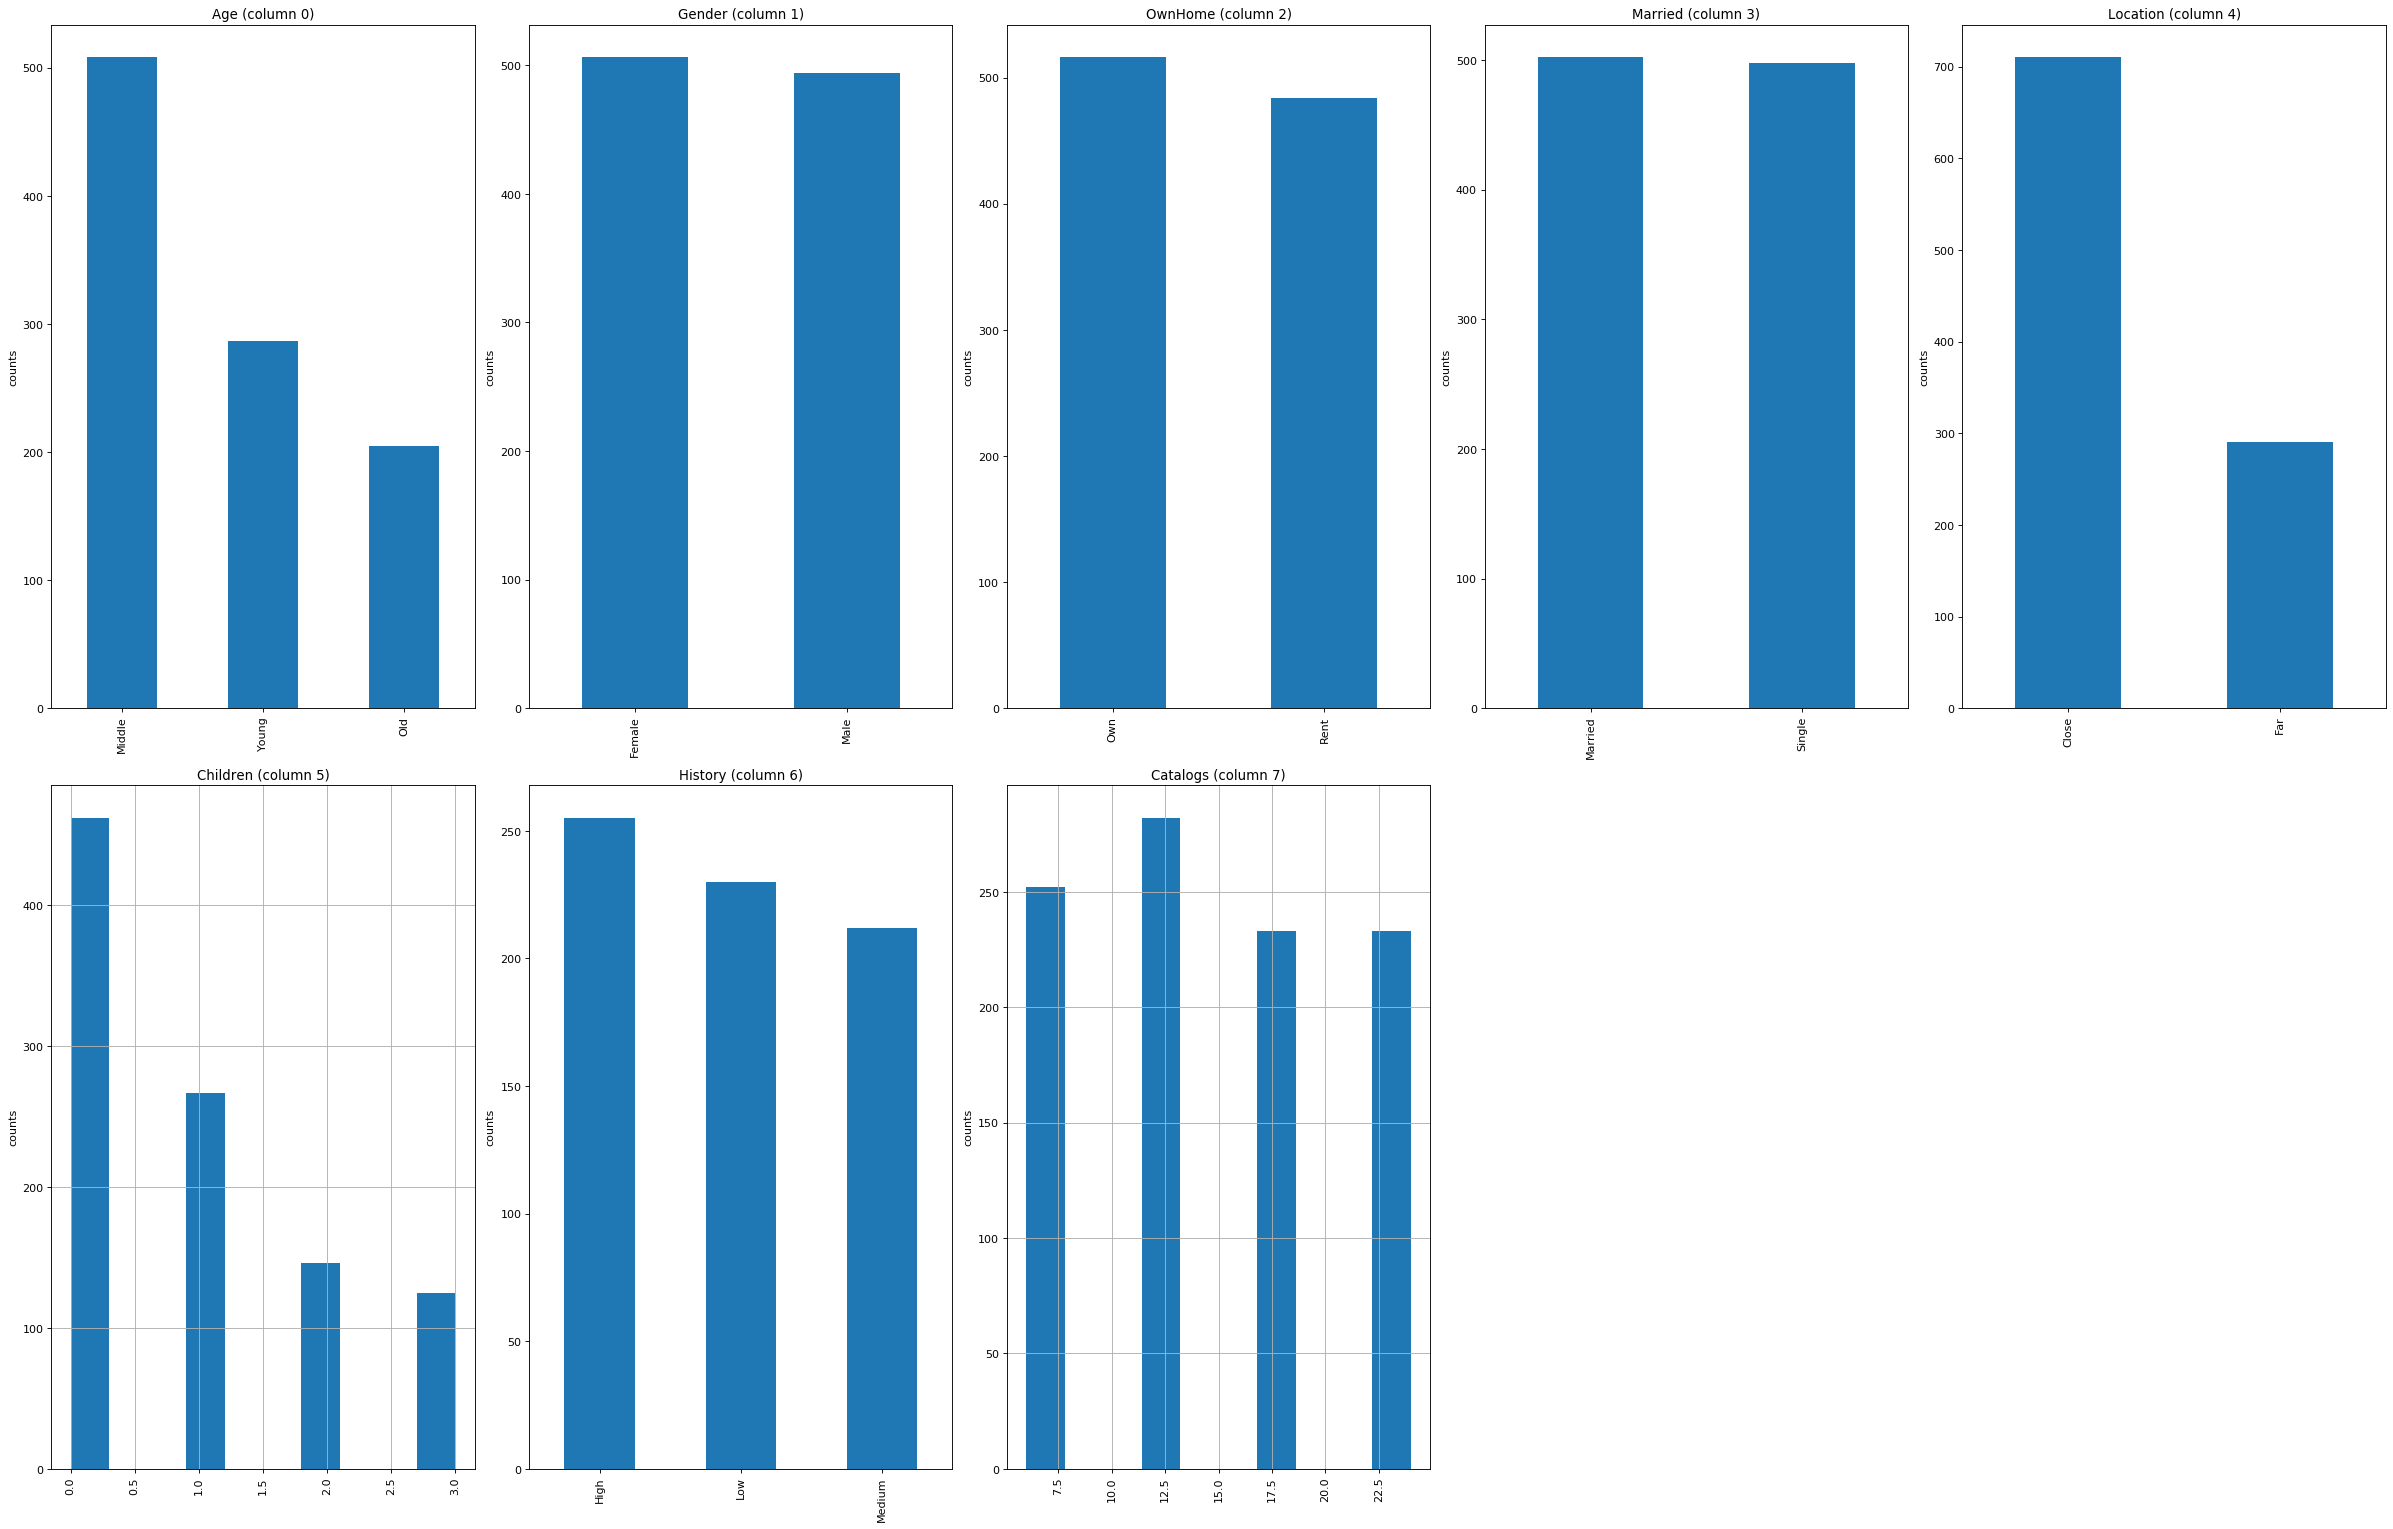

In [4]:
plotPerColumnDistribution(df, 10, 5) #Historgramose pavaizduotas lentelės duomenų pasiskirstymas. Šiose histogramose galime matyti tokius duomenis: 
#klientų amžiaus grupes, lytį, nuosavą ar nuomojamą būstą jie turi, ar jie vedę, susituokę, kokiu atstumu jie nutolę,
#kokia jų apsilankymų puslapyje istorija, kiek katalogų jie yra įsigijęs. Remiantis pasiskirstymų diagramomis matome, kad daugiausiai klientų yra vidutinio
#amžiaus, vyrų ir moterų skaičius yra apylygis (moterų 51 proc., o vyrų 49 proc.), pagal būstą pasiskirsčiusių kleintų kiekis irgi maždaug apylygis
#(nuosavą būstą turinčių yra 52 proc., o nuomojamą 58 proc.), susituokusių ir vienišų kiekis yra lygus (po 50 proc. kiekvieno). Didelė dalis klientų, pagal
#lokaciją, yra arčiau (pagal duomenis 71 proc. klientų yra arti, o 29 proc. klientų yra toli). Taip pat dažniausiai įsigyjamų katalogų kiekis yra tarp
#11 ir 14. 


# Koreliacijų matrica

In [5]:

 # Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
#filename = 'DirectMarketing.csv'
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
  # plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [6]:
df.corr() #Koreliacijų matrica - sudaryta iš skaitinių stulpelių (Uždarbio, vaikų kiekio, katalogų skaičiaus, išleidžiamos pinigų sumos). Matrica parodo, kiek 
#korialiuoja du įvykiai. Kuo arčiau 1, reiškia tuo labiau jie koreliuoja, kuo arčiau -1 - negatyviai koreliuoja, o kuo arčiau 0 - labai mažai koreliuoja. 
#Iš koreliacijų matricos matome, kad tai ką predictiname - išleistą pinigų kiekį (AmountSpent), labiausiai priklauso nuo uždarbio (Salary)

,Salary,Children,Catalogs,AmountSpent
Salary,1.000000,0.049663,0.183551,0.699596
Children,0.049663,1.000000,-0.113455,-0.222308
Catalogs,0.183551,-0.113455,1.000000,0.472650
AmountSpent,0.699596,-0.222308,0.472650,1.000000


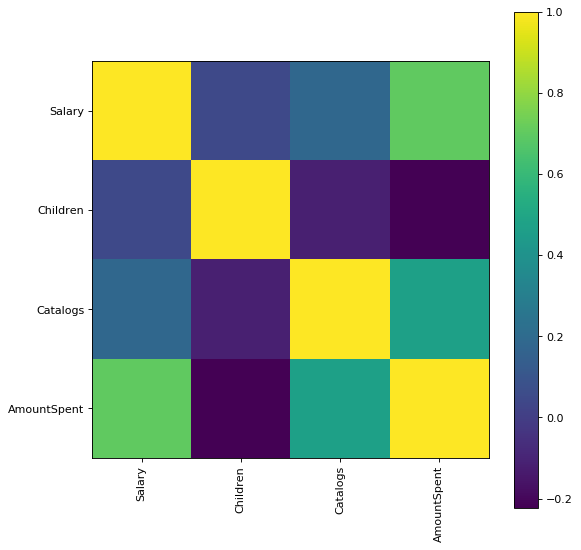

In [7]:
plotCorrelationMatrix(df, 8) #Koreliacijų matrica DirectMArketing.csv

# Skaitiniai stulpeliai

In [8]:

df1= pd.read_csv('C:\\Users\\samanta123\\Desktop\projektas\DirectMarketing.csv', usecols=[5,6,8,9])

In [9]:
df1.head(5)

,Salary,Children,Catalogs,AmountSpent
0,47500,0,6,755
1,63600,0,6,1318
2,13500,0,18,296
3,85600,1,18,2436
4,68400,0,12,1304


# Naujų stulpelių įterpimas

In [10]:
df1['AmountSpent'][df1['AmountSpent'].idxmin()] # maziausia isleista suma

38

In [11]:
df1['AmountSpent'][df1['AmountSpent'].idxmax()] #didziausia isleista suma

6217

In [12]:
bins=[38,2000,3000,4000,6217]

In [13]:
pav=['Mazai', 'Vidutiniskai', 'Daug', 'Labai daug']

In [14]:
df1['Islaidu kiekis']=pd.cut(df['AmountSpent'],bins, labels=pav)
df1.head(5)

,Salary,Children,Catalogs,AmountSpent,Islaidu kiekis
0,47500,0,6,755,Mazai
1,63600,0,6,1318,Mazai
2,13500,0,18,296,Mazai
3,85600,1,18,2436,Vidutiniskai
4,68400,0,12,1304,Mazai


In [15]:
def lytis(x):
    if x == 'Female':
        return 1
    if x == 'Male':
        return 0
    

In [16]:
df['Lytis'] = df['Gender'].apply(lytis)

In [17]:
df.head(5)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Lytis
0,Old,Female,Own,Single,Far,47500,0,High,6,755,1
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,0
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,1
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,0
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,1


In [18]:
def amz(x):
    if x == 'Old':
        return 4
    if x == 'Middle':
        return 3
    if x == 'Young':
        return 2
    

In [19]:
df['Amzius'] = df['Age'].apply(amz)

In [20]:
df.head(5)

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Lytis,Amzius
0,Old,Female,Own,Single,Far,47500,0,High,6,755,1,4
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,0,3
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,1,2
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,0,3
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,1,3


In [21]:
def loc(x):
    if x == 'Far':
        return 5
    if x == 'Close':
        return 6
    

In [22]:
df['Lokacija'] = df['Location'].apply(loc)

# Tekstinių stulpelių išmetimas

In [23]:
df.drop('History', axis=1, inplace=True)

In [24]:
df.drop('Married', axis=1, inplace=True)

In [25]:
df.drop('OwnHome', axis=1, inplace=True)

In [26]:
df.drop('Age', axis=1, inplace=True)

In [27]:
df.head(5)

,Gender,Location,Salary,Children,Catalogs,AmountSpent,Lytis,Amzius,Lokacija
0,Female,Far,47500,0,6,755,1,4,5
1,Male,Close,63600,0,6,1318,0,3,6
2,Female,Close,13500,0,18,296,1,2,6
3,Male,Close,85600,1,18,2436,0,3,6
4,Female,Close,68400,0,12,1304,1,3,6


In [28]:
#def lytis(x):
  #  if x == 'Female':
    #    return 1
    #if x == 'Male':
      #  return 0
    

In [29]:
#df['Lytis'] = df['Gender'].apply(lytis)  #įterpiamas naujas stulpelis, tekstas paverčiamas į skaičius. Female reiškia 1, male 0.

In [30]:
df.head(3)

,Gender,Location,Salary,Children,Catalogs,AmountSpent,Lytis,Amzius,Lokacija
0,Female,Far,47500,0,6,755,1,4,5
1,Male,Close,63600,0,6,1318,0,3,6
2,Female,Close,13500,0,18,296,1,2,6


In [31]:
#df_filtered = df.drop(["AmountSpent","Gender","Location"], axis=1)

# Linear Regression

In [32]:
#np.random.seed(42)
mask = np.random.rand(df.shape[0]) <= 0.7
#lr = LinearRegression()
#lr.fit(df_filtered.iloc[mask, :-1], df_filtered.iloc[mask, -1])
#pred = lr.predict(df_filtered.iloc[~mask, :-1])
#print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((pred - df_filtered.iloc[~mask, -1])**2))))

In [33]:
 lr = LinearRegression()
lr.fit(df[mask].drop(['AmountSpent', # we drop it because we are predicting it
                           'Gender',    # we drop it because it is string
                           'Location'],    # we drop it because it is string
                          axis=1),  # X_train
       df[mask]['AmountSpent'])             # y_train

pred = lr.predict(df[~mask].drop(['AmountSpent', 'Gender',
                                'Location'], axis=1))   # X_test
print('RMSE = {0:.02f}'.format(
    np.sqrt(np.mean((pred - df[~mask]['AmountSpent'])**2))))   # pred - y_test

RMSE = 503.25


# Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(df[mask].drop(['AmountSpent', 'Gender','Location'], axis=1),
       df[mask]['AmountSpent'])
pred = rf.predict(df[~mask].drop(['AmountSpent', 'Gender','Location'], axis=1))
print('RMSE = {0:.02f}'.format(np.sqrt(np.mean((pred - df[~mask]['AmountSpent'])**2))))

RMSE = 499.61


In [39]:
#Šiuo atveju palyginę du modelius (Linear Regression ir Random Forest) matome, kad geresnį rezultatą
#gauna Random Foresto modelis, tai galime matyti i6 RMSE

In [35]:
#df.drop('Gender', axis=1, inplace=True)


In [36]:
#df.drop('Location', axis=1, inplace=True)

In [37]:
df.head(5)

,Gender,Location,Salary,Children,Catalogs,AmountSpent,Lytis,Amzius,Lokacija
0,Female,Far,47500,0,6,755,1,4,5
1,Male,Close,63600,0,6,1318,0,3,6
2,Female,Close,13500,0,18,296,1,2,6
3,Male,Close,85600,1,18,2436,0,3,6
4,Female,Close,68400,0,12,1304,1,3,6


In [38]:
df.corr()

,Salary,Children,Catalogs,AmountSpent,Lytis,Amzius,Lokacija
Salary,1.000000,0.049663,0.183551,0.699596,-0.261492,0.384719,0.037127
Children,0.049663,1.000000,-0.113455,-0.222308,0.105469,-0.271118,-0.002391
Catalogs,0.183551,-0.113455,1.000000,0.472650,-0.087351,0.124460,-0.128581
AmountSpent,0.699596,-0.222308,0.472650,1.000000,-0.201690,0.348250,-0.252616
Lytis,-0.261492,0.105469,-0.087351,-0.201690,1.000000,-0.001459,-0.005554
Amzius,0.384719,-0.271118,0.124460,0.348250,-0.001459,1.000000,0.013350
Lokacija,0.037127,-0.002391,-0.128581,-0.252616,-0.005554,0.013350,1.000000
